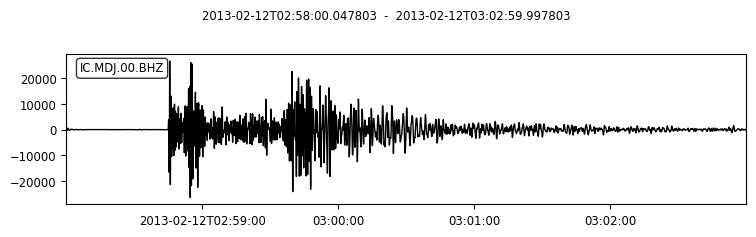

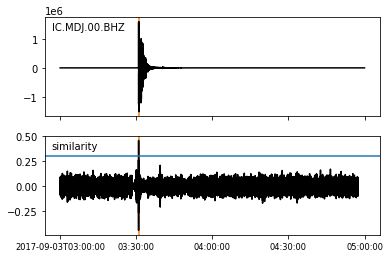

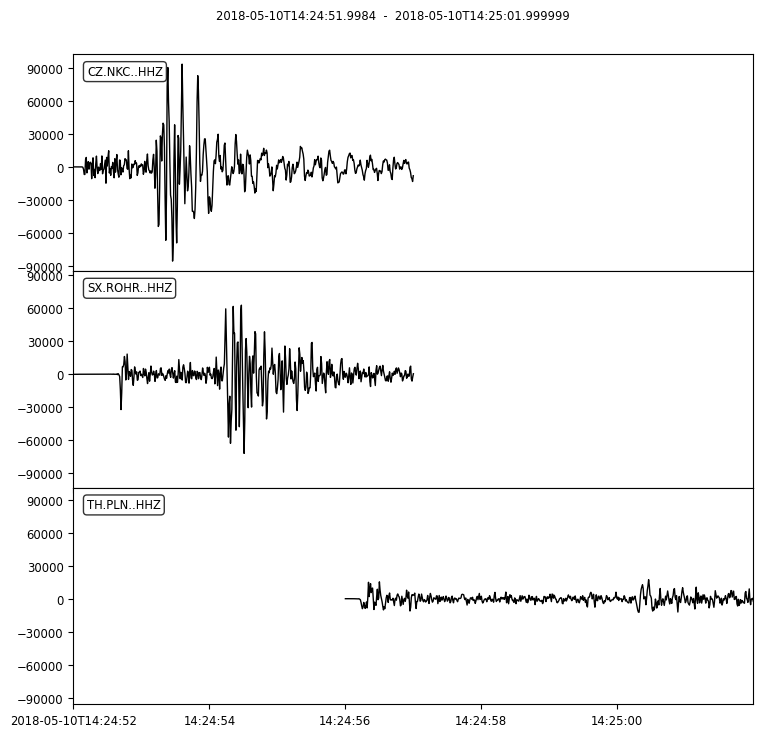

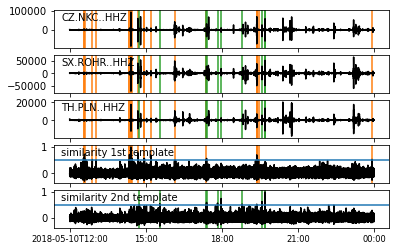

In [1]:
from obspy import read, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector

template = read('https://examples.obspy.org/IC.MDJ.2013.043.mseed')
template.filter('bandpass', freqmin=0.5, freqmax=2)
template.plot()

pick = UTC('2013-02-12T02:58:44.95')
template.trim(pick, pick + 150)

stream = read('https://examples.obspy.org/IC.MDJ.2017.246.mseed')
stream.filter('bandpass', freqmin=0.5, freqmax=2)
height = 0.3  # similarity threshold
distance = 10  # distance between detections in seconds
detections, sims = correlation_detector(stream, template, height, distance, plot=stream)

utc_nuclear_test_2013 = UTC('2013-02-12T02:57:51')
height = 0.2  # lower threshold
detections, sims = correlation_detector(
        stream, template, height, distance, template_times=utc_nuclear_test_2013)
detections

from obspy import read, Trace, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector

stream = read('https://examples.obspy.org/NKC_PLN_ROHR.HHZ.2018.130.mseed')
stream.filter('highpass', freq=1, zerophase=True)

otimes = [UTC('2018-05-10 14:24:50'), UTC('2018-05-10 19:42:08')]
templates = []
for otime in otimes:
    template = stream.select(station='NKC').slice(otime + 2, otime + 7)
    template += stream.select(station='ROHR').slice(otime + 2, otime + 7)
    template += stream.select(station='PLN').slice(otime + 6, otime + 12)
    templates.append(template)

template_magnitudes = [2.9, 2.8]
template_names = ['1st template', '2nd template']
templates[0].plot()

height = 0.5  # similarity threshold
distance = 10  # distance between detections in seconds
detections, sims = correlation_detector(stream, templates, height, distance, template_names=template_names, plot=stream)



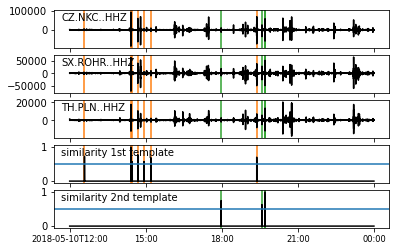

In [3]:
import numpy as np
def similarity_component_thres(ccs, thres, num_components):
    """Return Trace with mean of ccs
    and set values to zero if number of components above threshold is not reached"""
    ccmatrix = np.array([tr.data for tr in ccs])
    header = dict(sampling_rate=ccs[0].stats.sampling_rate,
                  starttime=ccs[0].stats.starttime)
    comp_thres = np.sum(ccmatrix > thres, axis=0) >= num_components
    data = np.mean(ccmatrix, axis=0) * comp_thres
    return Trace(data=data, header=header)

def simf(ccs):
    return similarity_component_thres(ccs, 0.5, 3)

detections, sims = correlation_detector(
        stream, templates, height, distance, similarity_func=simf, plot=stream,
        template_times=otimes, template_magnitudes=template_magnitudes, template_names=template_names)